In [7]:
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [8]:
#Reading the dataset
passenger_satisfaction = pd.read_csv('test.csv')
passenger_satisfaction.head(5)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [9]:
#Checking the target variables
passenger_satisfaction.groupby(['satisfaction']).count()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
satisfaction,,,,,,,,,,,,,,,,,,,,,
neutral or dissatisfied,14573,14573,14573,14573,14573,14573,14573,14573,14573,14573,...,14573,14573,14573,14573,14573,14573,14573,14573,14573,14528
satisfied,11403,11403,11403,11403,11403,11403,11403,11403,11403,11403,...,11403,11403,11403,11403,11403,11403,11403,11403,11403,11365


In [10]:
#Converting the target to numerical
pd.get_dummies(passenger_satisfaction['satisfaction'], drop_first = True)
passenger_satisfaction['satisfaction'] = pd.get_dummies(passenger_satisfaction['satisfaction'], drop_first = True)
passenger_satisfaction

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,1
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,1
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,0
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,1
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,...,4,3,2,4,4,5,4,0,0.0,0
25972,25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,...,4,4,5,5,5,5,4,0,0.0,1
25973,25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,...,2,4,3,4,5,4,2,0,0.0,0
25974,25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,...,4,3,2,5,4,5,4,0,0.0,1


NameError: name 'plt' is not defined

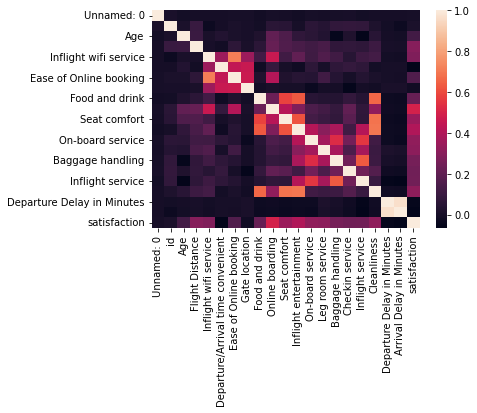

In [11]:
#Generate at least 3 data visualizations
sns.heatmap(passenger_satisfaction.corr())
plt.title('Correlation Plot')
plt.show()

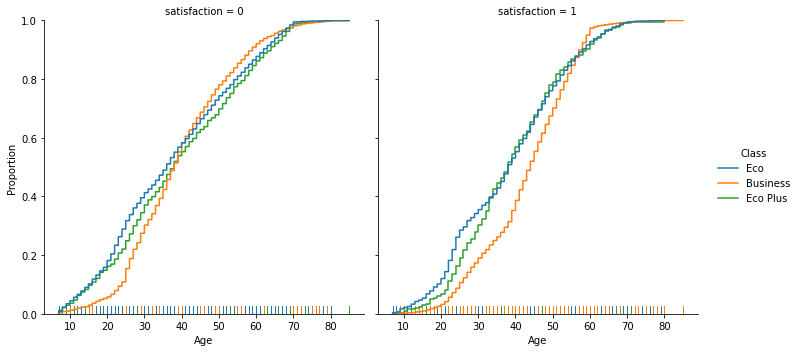

In [12]:
sns.displot(data=passenger_satisfaction, kind="ecdf", x="Age", col="satisfaction", hue="Class", rug=True)

<AxesSubplot:xlabel='satisfaction'>

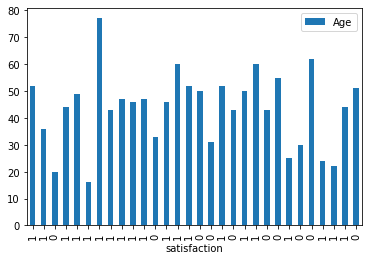

In [13]:
passenger_satisfaction.head(30).plot(kind='bar', x = 'satisfaction', y = 'Age')

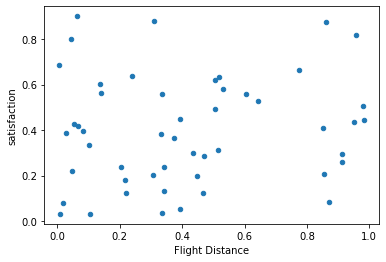

In [14]:
passenger_satisfaction2 = pd.DataFrame(np.random.rand(50, 2),
columns =['Flight Distance', 'satisfaction'])
passenger_satisfaction2.plot.scatter(x ='Flight Distance', y ='satisfaction');

[Text(0.5, 1.0, 'satisfaction per age')]

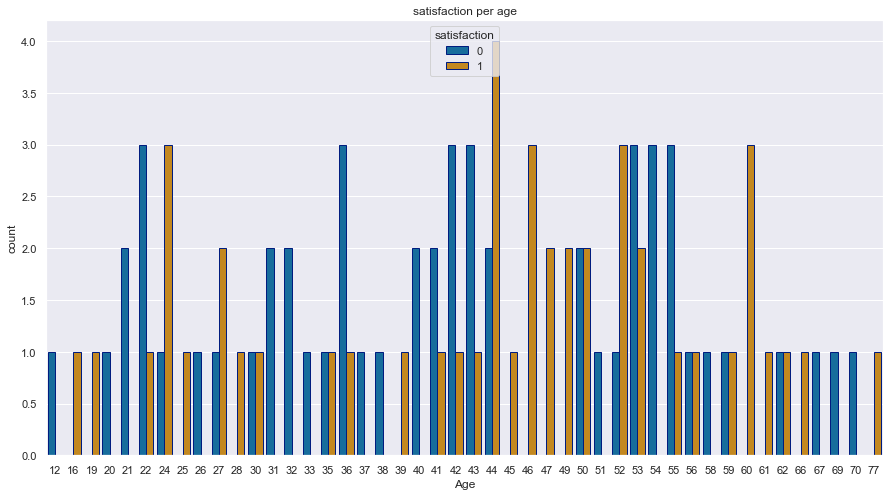

In [15]:
sns.set(rc = {'figure.figsize':(15,8)})

sns.countplot(x=passenger_satisfaction.head(100)['Age'], hue=passenger_satisfaction['satisfaction'], palette = 'colorblind', edgecolor = sns.color_palette('dark', n_colors = 1)).set(title='satisfaction per age')

In [16]:
#Finding how many Nans in the dataset
passenger_satisfaction.isna().sum()

Unnamed: 0                            0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0


In [17]:
#"Arrival Delay in Minutes" is unnecessery therefore, we will remove it
passenger_satisfaction = passenger_satisfaction.drop(['Arrival Delay in Minutes'], axis = 1)
passenger_satisfaction

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,3,5,5,5,5,2,5,5,50,1
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,5,4,4,4,4,3,4,5,0,1
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,2,4,1,3,2,2,2,0,0
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,4,1,1,1,1,3,1,4,0,1
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,2,4,2,4,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,...,4,4,3,2,4,4,5,4,0,0
25972,25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,...,4,4,4,5,5,5,5,4,0,1
25973,25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,...,2,2,4,3,4,5,4,2,0,0
25974,25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,...,4,4,3,2,5,4,5,4,0,1


In [18]:
#Splitting the dataset into features and targets
y = passenger_satisfaction[['satisfaction']].values
X = passenger_satisfaction[['Cleanliness', 'Inflight service', 'Checkin service', 'Baggage handling', 'Leg room service', 'Seat comfort']].values

In [19]:
#Splitting the dataset into training and test sets in the ratio 70/30
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 10)

In [20]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [21]:
#Training a decision tree classifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [22]:
#Training a Random Forests classifier
rf = RandomForestClassifier(n_estimators=10, criterion='gini',random_state=1)
rf.fit(X_train,y_train)

C:\Users\yaelr\AppData\Local\Temp/ipykernel_14352/4003244227.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


RandomForestClassifier(n_estimators=10, random_state=1)

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold 
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [24]:
#Performing 5-Fold Cross Validation
k = 5
kf = KFold(n_splits=k)

#for other scoring parameters see here https://scikit-learn.org/stable/modules/model_evaluation.html
result = cross_val_score(dt, X_train, y_train.ravel(), cv = kf, scoring='accuracy')
 
print(f' Avg accuracy:{result.mean()}')

 Avg accuracy:0.7538365315772709


In [25]:
#Performing 5-Fold Cross Validation
k = 5
kf = KFold(n_splits=k)

#for other scoring parameters see here https://scikit-learn.org/stable/modules/model_evaluation.html
result = cross_val_score(rf, X_train, y_train.ravel(), cv = kf, scoring='accuracy')
 
print(f' Avg accuracy:{result.mean()}')

 Avg accuracy:0.7620307177817038


In [26]:
#Making predictions using your test data (X_test)- Decision Tree
y_pred_dt = dt.predict(X_test)

In [27]:
#Making predictions using your test data (X_test)- Random Forests
y_pred_rf = rf.predict(X_test)

In [28]:
#Decision Tree - Generating Classification Report
print(classification_report(y_test, y_pred_dt, target_names = ['positive', 'negative']))

              precision    recall  f1-score   support

    positive       0.76      0.82      0.79      4338
    negative       0.75      0.67      0.71      3455

    accuracy                           0.75      7793
   macro avg       0.75      0.75      0.75      7793
weighted avg       0.75      0.75      0.75      7793



In [29]:
#Random Forests - Generating Classification Report
print(classification_report(y_test, y_pred_rf, target_names = ['positive', 'negative']))

              precision    recall  f1-score   support

    positive       0.77      0.81      0.79      4338
    negative       0.75      0.70      0.72      3455

    accuracy                           0.76      7793
   macro avg       0.76      0.75      0.75      7793
weighted avg       0.76      0.76      0.76      7793

